# Facebook Checkin Prediction
## Udacity Machine Learning Nanodegree Capstone Project

## Data Import

In [1]:
%matplotlib inline
# Import Libraries



import numpy as np
import pandas as pd

# Clear memory on initialize
test_df = None
train_df = None
train_data = None
test_data = None
formatted_feature_df = None
reduced_data = None
formatted_reduced_data = None


# Import Data
train_data = pd.read_csv("data/train.csv")
print "Training data loaded successfully"
print len(train_data)


Training data loaded successfully
29118021


## Data Formatting and Transformation
This section is used to perform any data reduction on the original dataset before proceeding. In some cases this step performs no function at all (if we are proceeding with the entire dataset for instance).

In [2]:
# Reduce the data to coordinate sets, minimum of 0.0 maximum of 10.0, this reduces overall working dataset size while
# maintaining neighbor relationships.

min_x = 0.0
max_x = 10.0
min_y = 0.0
max_y = 10.0

reduced_data = train_data[(train_data['x'] >= min_x) & (train_data['x'] <= max_x) & (train_data['y'] >= min_y) & (train_data['y'] <= max_y)]

# Remove csv import from Memory
train_data = None

# Cursory validation that data is imported properly
print reduced_data.head()

   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949


In [3]:
#remove original import if all data formatting is complete to save memory if necessary
train_data = None
test_data = None

## Statistics and Visualization
This section will provide basic statistic and graphical representations of the data correlated to the report section of the same name.

### Basic information about the dataset

In [4]:
# Run diagnostics after import

print "Training Data Length: " + str(len(reduced_data.index))


# Basic Statistics
print "\nUnique places in training set: " + str(reduced_data.place_id.nunique())
print "\nUnique X coordinates in training set: " + str(reduced_data.x.nunique())
print "\nMinimum and Maximum X coordiante: " + str(reduced_data.x.min()) + " " + str(reduced_data.x.max())
print "\nUnique Y coordinates in training set: " + str(reduced_data.y.nunique())
print "\nMinimum and Maximum Y coordiante: " + str(reduced_data.y.min()) + " " + str(reduced_data.y.max())
print "\nUnique timestamps in training set: " + str(reduced_data.time.nunique())
print "\nMinimum timestamp in training set: " + str(reduced_data.time.min())
print "\nMaximum timestamp in training set: " + str(reduced_data.time.max())
print "\nUnique accuracy measures in training set: " + str(reduced_data.accuracy.nunique())

Training Data Length: 29118021

Unique places in training set: 108390

Unique X coordinates in training set: 100001

Minimum and Maximum X coordiante: 0.0 10.0

Unique Y coordinates in training set: 100001

Minimum and Maximum Y coordiante: 0.0 10.0

Unique timestamps in training set: 786239

Minimum timestamp in training set: 1

Maximum timestamp in training set: 786239

Unique accuracy measures in training set: 1025


### Feature reformatting
In this section, features such as time will be reformatted to more useful formats as discussed in the associated report.

In this case, the time will be reduced from completely linear, into a Day of the Week, Hour of the Day formatted as 0-6 for the day and 0-23 for the hour and split into two columns

In [5]:
from pandas import *
def SetDay(x):
    x = float(x)
    day_of_week = x/(60*24*7) - int(x/(60*24*7))
    day_exact = day_of_week*7
    day = int(day_exact)
    hour_exact = (day_exact - day)*24
    hour = int(hour_exact)
    return day, hour

reduced_data["day"], reduced_data["hour"] = zip(*reduced_data["time"].map(SetDay))

print reduced_data.head()

   row_id       x       y  accuracy    time    place_id  day  hour
0       0  0.7941  9.0809        54  470702  8523065625    4    21
1       1  5.9567  4.7968        13  186555  1757726713    3    13
2       2  8.3078  7.0407        74  322648  1137537235    0     1
3       3  7.3665  2.5165        65  704587  6567393236    6     7
4       4  4.0961  1.1307        31  472130  7440663949    5    20


### Graphical Representation of the Dataset

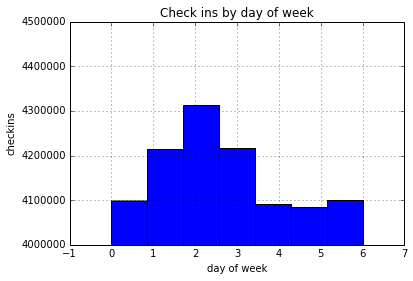

In [6]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# the histogram of the data
plt.hist(reduced_data['day'], 7)


plt.xlabel('day of week')
plt.ylabel('checkins')
plt.title('Check ins by day of week')
plt.axis([-1, 7, 4000000, 4500000])
plt.grid(True)
plt.show()

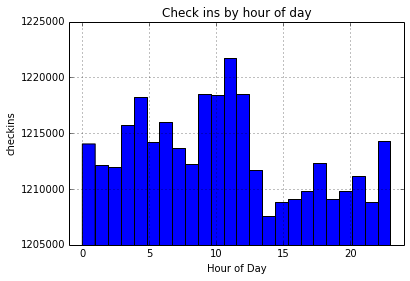

In [7]:
plt.hist(reduced_data['hour'], 24)


plt.xlabel('Hour of Day')
plt.ylabel('checkins')
plt.title('Check ins by hour of day')
plt.axis([-1, 24, 1205000, 1225000])
plt.grid(True)
plt.show()

### Sample data and plot in x,y space

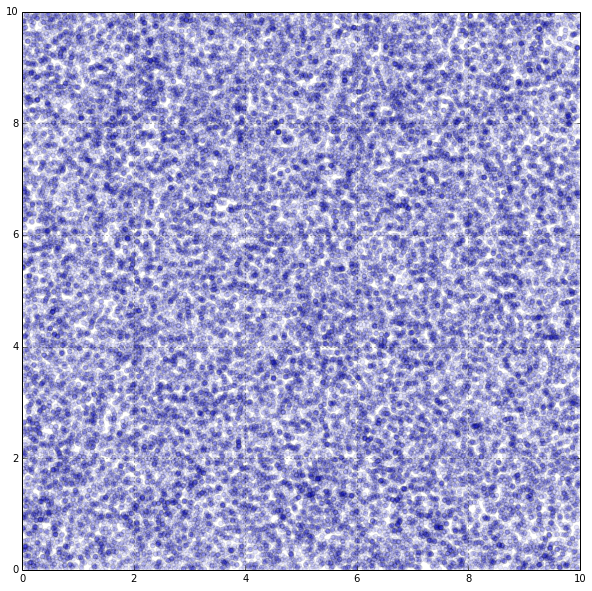

In [8]:
sample_data = reduced_data.sample(n=50000)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(sample_data["x"], sample_data["y"], marker = "o", alpha=0.1)
plt.axis([0,10,0,10])
plt.grid(True)
plt.show()

### Explore Accuracy

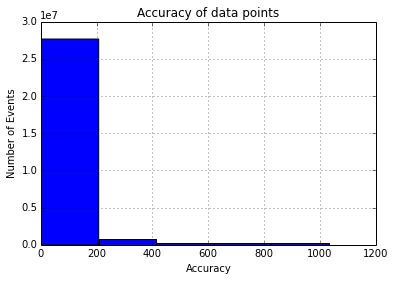

In [9]:
plt.hist(reduced_data['accuracy'], 5)


plt.xlabel('Accuracy')
plt.ylabel('Number of Events')
plt.title('Accuracy of data points')
plt.grid(True)
plt.show()

#### Notes on Accuracy
Without any information as to what "accuracy" really means in the context of this problem, it has to be assumed that it is related to GPS accuracy down to some measurement. It is my belief that a lower number would mean that the GPS signal is more accurate, whether it be accounted for in this problem or not which would be unrelated to a person's behavior and would only serve to create a "noisy" GPS signal. With that in mind, there are two methods for proceeding, one would be to ignore the accuracy metric entirely, second would be to filter out accuracy metrics that fell outside of some statistical measurement. For this problem I will take data within one standard deviation of the mean and disregard all others.

### Statistical Analysis of the Dataset

From the previous section it is apparent that there is very little variation in checkin behavior by GPS coordinate, by time of the day, or by day of the week. The plot of x,y data does reveal local concentrations which could be considered to be "popular" check-in spots. Since the check-in ID's are simply randomly assigned values, statistical analysis of those values would be mostly meaningless. From this point it is apparent that this is a very difficult machine learning problem with no obvious patterns or data concentrations.

The only statistical analysis that will be done on this problem will be to filter the accuracy metric.

By my estimation, basic statistical measurements on this dataset other than accuracy will not reveal anything. I will proceed to the machine learning portion of this report after filtering the accuracy metrics. 

In [10]:
average = np.mean(reduced_data['accuracy'])
standard_dev = np.std(reduced_data['accuracy'])
minimum_accuracy = average - standard_dev
maximum_accuracy = average + standard_dev
print "Average Accuracy " + str(average)
print "\nStandard Deviation " + str(standard_dev)
print "\nMinimum Accuracy " + str(minimum_accuracy)
print "\nMaximum Accuracy " + str(maximum_accuracy)

Average Accuracy 82.8491249457

Standard Deviation 114.751770383

Minimum Accuracy -31.9026454374

Maximum Accuracy 197.600895329


## Final Data Formatting
Remove original timestamps, analyze accuracy measures and filter data.

In [11]:
# Remove Accuracy
# formatted_reduced_data = reduced_data[reduced_data.accuracy <= maximum_accuracy]
formatted_reduced_data = reduced_data.drop('time', 1)
# formatted_reduced_data = formatted_reduced_data.drop('accuracy', 1)


# Don't remove accuracy
formatted_reduced_data = reduced_data
print formatted_reduced_data.head()
reduced_data = None

   row_id       x       y  accuracy    time    place_id  day  hour
0       0  0.7941  9.0809        54  470702  8523065625    4    21
1       1  5.9567  4.7968        13  186555  1757726713    3    13
2       2  8.3078  7.0407        74  322648  1137537235    0     1
3       3  7.3665  2.5165        65  704587  6567393236    6     7
4       4  4.0961  1.1307        31  472130  7440663949    5    20


In [12]:
print len(formatted_reduced_data)

29118021


## Machine Learning Algorithms and Testing

In [13]:
import time
import os
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



## Modified Chunk of code from Brad Miller's (my) ML Nanodegree Project 2
def sampling_data(data, sample_size, test_percentage, X_coord=0.0, y_coord=0.0, step_distance=10.0):
    
    # Select chunks of data based on x,y coordinates, defualts to entire dataset.
    # Min and Max coords
    min_x = X_coord
    max_x = X_coord + step_distance
    min_y = y_coord
    max_y = y_coord + step_distance
    
    # Reduce data to selected x,y range
    if X_coord == 0.0 and y_coord == 0.0 and step_distance == 10.0:
        selected_data = formatted_reduced_data
    else:
        selected_data = formatted_reduced_data[(formatted_reduced_data['x'] >= min_x) & (formatted_reduced_data['x'] <= max_x) & (formatted_reduced_data['y'] >= min_y) & (formatted_reduced_data['y'] <= max_y)]

    
    # Check amount of data in slice of data set and reduce to available data if less than desired sample size
    if len(selected_data) < sample_size:
        print "Sample size larger than available data, using all available data"
        sample_size = len(selected_data)
    
    
    # Randomly sample the data and split into features/targets
    sample_set = selected_data.sample(n=sample_size)
    feature_sample = data[['x', 'y', 'day', 'hour']]
    target_sample = data['place_id']

    # Change index on DataFrame
    feature_sample_df = pd.DataFrame(feature_sample, index=sample_set['row_id'], columns=['x','y','hour','day'])
    target_sample_df = pd.DataFrame(target_sample, index=sample_set['row_id'], columns=['place_id'])

    # First, decide how many training vs test samples you want
    num_all = feature_sample_df.shape[0]  


    # set testing set size in percentage
    testing_set_percentage = test_percentage


    #set testing set size (in number of data points as a float) and the number of training sets
    testing_set_size = round(len(sample_set)*testing_set_percentage)
    num_training_sets = 10
    training_set_total = len(sample_set) - testing_set_size
    training_size_iterator = training_set_total/num_training_sets

    from sklearn.cross_validation import train_test_split

    # initiate iterator for loop
    i = 1

    # instantiate empty dict for data
    complete_data = {}

    while i <= num_training_sets:
        training_set_size = i*training_size_iterator
        X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(
            feature_sample_df, target_sample_df, test_size=float(testing_set_size)/len(sample_set), train_size = float(training_set_size)/len(sample_set), random_state=41)

        dataset_list = [X_train_iter, y_train_iter, X_test_iter, y_test_iter]
        complete_data[str(int(training_set_size))] = dataset_list
        i+=1

    # TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
    # Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
    print "Training set: {} samples".format(complete_data[str(int(training_set_size))][0].shape[0])
    print "Test set: {} samples".format(complete_data[str(int(training_set_size))][2].shape[0])
    print "Total segment size: " + str(len(selected_data))
    # Note: If you need a validation set, extract it from within training data
    
    return X_train_iter, y_train_iter, X_test_iter, y_test_iter
print"Done"

Done


### K Neighbors Baseline
Create a baseline using K Nearest Neighbors with 1 neighbor. Which will be considered as "baseline" performance.

!!! Skip if Not Baselining Dataset !!!





In [68]:
# Create Sample for Baseline Figures
X_train_iter, y_train_iter, X_test_iter, y_test_iter = sampling_data(formatted_reduced_data, 12500, 0.2, 1.0, 1.0, 0.25)

Training set: 10000 samples
Test set: 2500 samples
Total segment size: 24830


In [69]:
# Call sampling function

neigh = KNeighborsClassifier(n_neighbors=1)
start = time.time()
neigh.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.011


In [70]:
start = time.time()
print neigh.score(X_test_iter, np.ravel(y_test_iter))
print neigh.predict(X_test_iter.tail(1))
end = time.time()
print "Done!\nTesting time (secs): {:.3f}".format(end - start)

0.3872
[7011777512]
Done!
Testing time (secs): 0.055


### Decision Tree Baseline
Test a decision tree

In [13]:
tree = DecisionTreeClassifier()
start = time.time()
tree.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.245


In [14]:
start = time.time()
print tree.score(X_test_iter, np.ravel(y_test_iter))
print tree.predict(X_test_iter.tail(1))
probs = tree.predict_proba(X_test_iter.tail(1))
print np.amax(probs)
end = time.time()
print "Done!\nValidating time (secs): {:.3f}".format(end - start)

0.368
[6026000998]
1.0
Done!
Validating time (secs): 0.021


### Naive Bayes 
Test gaussian naive bayes

!!! Very expensive. Skip on large, unrestricted samples

In [15]:
NBclf = GaussianNB()
start = time.time()
NBclf.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.081


In [16]:
start = time.time()
print NBclf.score(X_test_iter, np.ravel(y_test_iter))
print NBclf.predict(X_test_iter.tail(1))
probs = NBclf.predict_proba(X_test_iter.tail(1))
print np.argmax(probs)
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

0.4064
[6026000998]
262
Done!
Training time (secs): 0.266


In [17]:
print y_test_iter.tail(1)

            place_id
row_id              
11777890  6026000998


### Refine Algorithm and Sample set
In this section, the previous three tests, 1-NN, Decision Trees, and Naive Bayes will be performed again, but on a sampled dataset limited to a geographic region. Meaning instead of sample from the entire dataset, this sample will be taken from a dataset within a range of x,y coordinates.

In [15]:
def run_multi_algo(x_y_array, sample_size=10000, side_length=0.2, train_test_split=0.2):
    sum_scores = 0.0
    for x_y in x_y_array:
        min_x = x_y[0]
        min_y = x_y[1]
        X_train_iter, y_train_iter, X_test_iter, y_test_iter = sampling_data(formatted_reduced_data, sample_size, train_test_split, min_x, min_y, side_length) 
        start = time.time()
        # Training Algorithms using a multi algorithm approach
        # Nearest Neighbors
        kn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=5, weights='distance')
        kn.fit(X_train_iter, np.ravel(y_train_iter))

        # Decision Tree
        DTree = DecisionTreeClassifier(criterion='entropy', max_features= None, min_samples_leaf=10, min_samples_split= 4, splitter='best')
        DTree.fit(X_train_iter, np.ravel(y_train_iter))

        # Naive Bayes
        bayesCLF = GaussianNB()
        bayesCLF.fit(X_train_iter, np.ravel(y_train_iter))
        
        end = time.time()
        print "Done!\nTraining time (secs): {:.3f}".format(end - start)

        
        # TODO: Maybe move this to a function, tried once, didn't seem to pass the dataframes and estimators between functions well
        # Scoring Function
        total_score = 0
        score_count = 0
        row_index = 0
        # Iterate through data rows
        for index, row in X_test_iter.iterrows():
            row = row.as_matrix()
            row = row.reshape(1,-1)
            kn_pred = kn.predict(row).item()
            dt_pred = DTree.predict(row).item()
            nb_pred = bayesCLF.predict(row).item()
            actual = y_test_iter.loc[[index]].place_id.item()
            if kn_pred == actual or dt_pred == actual or nb_pred == actual:
                score_count = score_count + 1
        total_score = float(score_count)/float(len(X_test_iter))        
        
        # Report iterative results
        print "Iterative Score: " + str(total_score)
        sum_scores = sum_scores + total_score
        print "\n_________"
        
    # Report final results   
    final_score = sum_scores/len(x_y_array)
    print "Final Score: " + str(round(final_score, 6))

In [16]:
x_y_array = [[1.0,1.0],[2.0,1.0],[4.0,3.0],[8.0,4.0],[5.0,9.0]]

run_multi_algo(x_y_array, 12500, 0.125, 0.2)

Sample size larger than available data, using all available data
Training set: 6179 samples
Test set: 1545 samples
Total segment size: 7724
Done!
Training time (secs): 0.268
Iterative Score: 0.603883495146

_________
Sample size larger than available data, using all available data
Training set: 4131 samples
Test set: 1033 samples
Total segment size: 5164
Done!
Training time (secs): 0.160
Iterative Score: 0.581800580833

_________
Sample size larger than available data, using all available data
Training set: 4030 samples
Test set: 1007 samples
Total segment size: 5037
Done!
Training time (secs): 0.157
Iterative Score: 0.578947368421

_________
Sample size larger than available data, using all available data
Training set: 3187 samples
Test set: 797 samples
Total segment size: 3984
Done!
Training time (secs): 0.109
Iterative Score: 0.632371392723

_________
Sample size larger than available data, using all available data
Training set: 3727 samples
Test set: 932 samples
Total segment size:

### Optimize Estimators
Tune all parameters for K-NN and Decision Trees, skipping Gaussian Naive Bayes as it does not have any tunable parameters

In [22]:
from sklearn.grid_search import GridSearchCV

In [23]:
# Grid Search K-NN

param_grid = [
    {'n_neighbors': [1,2,5,6,7,8,10], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'leaf_size': [10,20,30,50,100]}
]

k_neigh = KNeighborsClassifier()
k_neigh_clf = GridSearchCV(k_neigh, param_grid)
k_neigh_clf.fit(X_train_iter, np.ravel(y_train_iter))
k_neigh_clf.best_params_

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 5,
 'weights': 'distance'}

In [24]:
# Decision Trees
param_grid = [
    {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_features': ('auto', 'sqrt', 'log2', None), 'min_samples_split': [1,2,3,4,5,10,20], 'min_samples_leaf': [1,2,3,4,5,10,20]}
]

DTree = DecisionTreeClassifier()
DTree_clf = GridSearchCV(DTree, param_grid)
DTree_clf.fit(X_train_iter, np.ravel(y_train_iter))
DTree_clf.best_params_

{'criterion': 'gini',
 'max_features': None,
 'min_samples_leaf': 20,
 'min_samples_split': 1,
 'splitter': 'best'}

In [ ]:
# Naive Bayes does not have any tunable parameters so it will be skipped

### Prepare test data for submission
This is a step specific to the Kaggle competition. There are over 8 million datapoints that must be predicted and submitted. This is an extremely long running process, DO NOT PROCEED PAST THIS POINT IF ONLY RUNNING FOR VALIDATION PURPOSES - I will be adding on to my code beginning here to create a submission for the Kaggle competition.

In [10]:
# Import & Format Test Data
test_data = pd.read_csv("data/test.csv")
print "Test data loaded successfully"
print len(test_data)
test_data["day"], test_data["hour"] = zip(*test_data["time"].map(SetDay))
reduced_test_data = test_data.drop('time', 1)

print reduced_test_data.head()

Test data loaded successfully
8607230
   row_id       x       y  accuracy  day  hour
0       0  0.1675  1.3608       107    2    10
1       1  7.3909  2.5301        35    4     3
2       2  8.0978  2.3473        62    6    10
3       3  0.9990  1.0591        62    0     1
4       4  0.6670  9.7254        40    4    23


In [21]:
formatted_test_data = pd.DataFrame(reduced_test_data, index=reduced_test_data['row_id'], columns=['x','y','hour','day'])
print formatted_test_data.head()

             x       y  hour  day
row_id                           
0       0.1675  1.3608    10    2
1       7.3909  2.5301     3    4
2       8.0978  2.3473    10    6
3       0.9990  1.0591     1    0
4       0.6670  9.7254    23    4


In [67]:
iteration_length = len(coordinate_array)

def TrainPredict(training_set, testing_set, x_coord, y_coord, side_length=0.25, buffer_length=0.05):
    result_frame = pd.DataFrame()
    
    min_test_x = testing_set.x.min()
    max_test_x = testing_set.x.max()
    min_test_y = testing_set.y.min()
    max_test_y = testing_set.y.min()
    termination_x = max_test_x - side_length
    termination_y = max_test_y - side_length
    
    # Set Testing Data Coordinates
    min_test_x = x_coord
    max_test_x = x_coord + side_length
    min_test_y = y_coord
    max_test_y = y_coord + side_length
    
    
    # Set Training Data Coordinates
    if x_coord == 0 and y_coord == 0:
        
        min_train_x = x_coord
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord
        max_train_y = y_coord + side_length + buffer_length
        
    elif x_coord == 0 and y_coord < termination_y and y_coord > 0:
        min_train_x = x_coord
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length + buffer_length

        
    elif x_coord == 0 and y_coord >= termination_y:
        min_train_x = x_coord
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length

        
    elif x_coord < termination_x and x_coord > 0 and y_coord == 0:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord 
        max_train_y = y_coord + side_length + buffer_length

        
    elif x_coord < termination_x and x_coord > 0 and y_coord >= termination_y:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length

    
    elif x_coord >= termination_x and y_coord == 0:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length
        min_train_y = y_coord
        max_train_y = y_coord + side_length + buffer_length

    
    elif x_coord >= termination_x and y_coord > 0:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length + buffer_length

        
    elif x_coord >= termination_x and y_coord >= termination_y:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length

    
    else:
        min_train_x = x_coord - buffer_length
        max_train_x = x_coord + side_length + buffer_length
        min_train_y = y_coord - buffer_length
        max_train_y = y_coord + side_length + buffer_length
        
    
   
    training_set = training_set[(training_set['x'] >= min_train_x) & (training_set['x'] <= max_train_x) & (training_set['y'] >= min_train_y) & (training_set['y'] <= max_train_y)]
    testing_set = testing_set[(testing_set['x'] >= min_test_x) & (testing_set['x'] <= max_test_x) & (testing_set['y'] >= min_test_y) & (testing_set['y'] <= max_test_y)]
    
    training_features = training_set[['x', 'y', 'day', 'hour']]
    training_targets = training_set['place_id']
    
    testing_features = testing_set[['x', 'y', 'day', 'hour']]
    
    # KNN
    kn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=5, weights='distance')
    kn.fit(training_features, np.ravel(training_targets))

    # Decision Tree
    DTree = DecisionTreeClassifier(criterion='entropy', max_features= None, min_samples_leaf=10, min_samples_split= 4, splitter='best')
    DTree.fit(training_features, np.ravel(training_targets))

    # Naive Bayes
    bayesCLF = GaussianNB()
    bayesCLF.fit(training_features, np.ravel(training_targets))
    
    
    
    
    # TODO: Maybe move this to a function, tried once, didn't seem to pass the dataframes and estimators between functions well
    # Scoring Function
    # Iterate through data rows
    for index, row in testing_features.iterrows():
        row = row.as_matrix()
        row = row.reshape(1,-1)
        kn_pred = kn.predict(row).item()
        dt_pred = DTree.predict(row).item()
        nb_pred = bayesCLF.predict(row).item()
        df2 = pd.DataFrame([[index, kn_pred, dt_pred, nb_pred]], columns=['Row_ID', 'KN', 'DT', 'NB'])
        result_frame = result_frame.append(df2, ignore_index=True)
    
    
    return result_frame

In [69]:
final_result = pd.DataFrame()

# Create array of segments from complete coordinate space

global_min_x = formatted_reduced_data.x.min()
global_min_y = formatted_reduced_data.y.min()
global_max_x = formatted_reduced_data.x.max()
global_max_y = formatted_reduced_data.y.max()

# Set segment length
segment_length = 0.125

termination_x = global_max_x - segment_length
termination_y = global_max_y - segment_length


x_segments = (global_max_x - global_min_x)/segment_length
y_segments = (global_max_y - global_min_y)/segment_length
total_segments = x_segments * y_segments
x_location = global_min_x
y_location = global_min_y
array_location = 0
coordinate_array = []

while x_location <= termination_x:
    while y_location <= termination_y:
        coordinate_array.append([x_location, y_location])
        y_location = y_location + segment_length
        array_location = array_location + 1
        
    x_location = x_location + segment_length
    y_location = global_min_y

test_array = [[1,2],[2,3],[4,5],[6,7],[4,3],[0,0]]

tracker = 1
for coordinate in coordinate_array:
    final_result = final_result.append(TrainPredict(formatted_reduced_data, formatted_test_data, coordinate[0], coordinate[1], segment_length, 0.02))
    if tracker%5 == 0:
        print "Group " + str(tracker) + " of " + str(len(coordinate_array))
    tracker = tracker + 1
    
    

Group 5 of 6400
Group 10 of 6400
Group 15 of 6400
Group 20 of 6400
Group 25 of 6400
Group 30 of 6400
Group 35 of 6400
Group 40 of 6400
Group 45 of 6400
Group 50 of 6400
Group 55 of 6400
Group 60 of 6400
Group 65 of 6400
Group 70 of 6400
Group 75 of 6400
Group 80 of 6400
Group 85 of 6400
Group 90 of 6400
Group 95 of 6400
Group 100 of 6400
Group 105 of 6400
Group 110 of 6400
Group 115 of 6400
Group 120 of 6400
Group 125 of 6400
Group 130 of 6400
Group 135 of 6400
Group 140 of 6400
Group 145 of 6400
Group 150 of 6400
Group 155 of 6400
Group 160 of 6400
Group 165 of 6400
Group 170 of 6400
Group 175 of 6400
Group 180 of 6400
Group 185 of 6400
Group 190 of 6400
Group 195 of 6400
Group 200 of 6400
Group 205 of 6400
Group 210 of 6400
Group 215 of 6400
Group 220 of 6400
Group 225 of 6400
Group 230 of 6400
Group 235 of 6400
Group 240 of 6400
Group 245 of 6400
Group 250 of 6400
Group 255 of 6400
Group 260 of 6400
Group 265 of 6400
Group 270 of 6400
Group 275 of 6400
Group 280 of 6400
Group 285 of

In [70]:
print final_result.head()


   Row_ID          KN          DT          NB
0     442  1478305117  5003921802  1478305117
1    2133  4492862780  7065354365  7065354365
2    3200  5079685869  5003921802  5003921802
3    4345  1006316884  1006316884  1006316884
4   15097  5349374802  8378301865  5838591954


In [73]:
final_result.to_csv(path_or_buf="data/result.csv")

In [74]:
print "done"

done


In [79]:
formatted_final_result = final_result
formatted_final_result["place_id"] = formatted_final_result["KN"].map(str) + ' ' + formatted_final_result["DT"].map(str) + ' ' +formatted_final_result["NB"].map(str)


In [80]:
print formatted_final_result.head()

   Row_ID          KN          DT          NB  \
0     442  1478305117  5003921802  1478305117   
1    2133  4492862780  7065354365  7065354365   
2    3200  5079685869  5003921802  5003921802   
3    4345  1006316884  1006316884  1006316884   
4   15097  5349374802  8378301865  5838591954   

                           place_id  
0  1478305117 5003921802 1478305117  
1  4492862780 7065354365 7065354365  
2  5079685869 5003921802 5003921802  
3  1006316884 1006316884 1006316884  
4  5349374802 8378301865 5838591954  


In [81]:
formatted_final_result = formatted_final_result.drop('KN', 1)
formatted_final_result = formatted_final_result.drop('DT', 1)
formatted_final_result = formatted_final_result.drop('NB', 1)
formatted_final_result.columns = ['row_id', 'place_id']
print formatted_final_result.head()

   row_id                          place_id
0     442  1478305117 5003921802 1478305117
1    2133  4492862780 7065354365 7065354365
2    3200  5079685869 5003921802 5003921802
3    4345  1006316884 1006316884 1006316884
4   15097  5349374802 8378301865 5838591954


In [83]:
formatted_final_result = formatted_final_result.set_index('row_id')

In [91]:
formatted_final_result_finished = formatted_final_result.groupby(formatted_final_result.index).first()

print len(formatted_final_result_finished)

8607230


In [86]:
print len(formatted_test_data)

8607230


In [92]:
formatted_final_result_finished.to_csv(path_or_buf="data/final_submission.csv")